In [24]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Set display options
pd.set_option('display.max_columns', None)

# Define data directory
DATA_DIR = 'data/'

# Sports Data Analysis

This notebook provides a comprehensive investigation of the player and stint data.

## 1. Load the Data

In [25]:
# Load the datasets
player_data = pd.read_csv(DATA_DIR + 'player_data.csv')
stint_data = pd.read_csv(DATA_DIR + 'stint_data.csv')

print("Player data shape:", player_data.shape)
print("Stint data shape:", stint_data.shape)

Player data shape: (144, 2)
Stint data shape: (7448, 14)


### Preview Player Data

In [26]:
player_data.head(10)

,player,rating
0,USA_p1,3.0
1,USA_p2,3.0
2,USA_p3,3.5
3,USA_p4,0.0
4,USA_p5,2.0
5,USA_p6,0.5
6,USA_p7,1.5
7,USA_p8,2.5
8,USA_p9,1.0
9,USA_p10,1.0


### Preview Stint Data

In [27]:
stint_data.head(10)

,game_id,h_team,a_team,minutes,h_goals,a_goals,home1,home2,home3,home4,away1,away2,away3,away4
0,1,USA,Japan,4.252969,4,9,USA_p4,USA_p1,USA_p3,USA_p6,Japan_p12,Japan_p4,Japan_p8,Japan_p6
1,1,USA,Japan,5.688809,6,11,USA_p1,USA_p7,USA_p6,USA_p5,Japan_p7,Japan_p10,Japan_p8,Japan_p12
2,1,USA,Japan,1.149557,0,1,USA_p8,USA_p1,USA_p4,USA_p5,Japan_p5,Japan_p3,Japan_p7,Japan_p10
3,1,USA,Japan,3.511617,7,5,USA_p2,USA_p7,USA_p8,USA_p6,Japan_p2,Japan_p4,Japan_p10,Japan_p12
4,1,USA,Japan,2.163139,7,5,USA_p9,USA_p5,USA_p8,USA_p7,Japan_p8,Japan_p6,Japan_p10,Japan_p1
5,1,USA,Japan,2.155972,0,6,USA_p2,USA_p4,USA_p7,USA_p12,Japan_p1,Japan_p8,Japan_p11,Japan_p10
6,1,USA,Japan,1.496071,4,0,USA_p7,USA_p1,USA_p4,USA_p2,Japan_p5,Japan_p4,Japan_p3,Japan_p6
7,1,USA,Japan,4.248619,8,13,USA_p1,USA_p6,USA_p10,USA_p12,Japan_p10,Japan_p9,Japan_p12,Japan_p4
8,1,USA,Japan,1.945645,0,5,USA_p7,USA_p8,USA_p3,USA_p6,Japan_p8,Japan_p7,Japan_p12,Japan_p3
9,1,USA,Japan,3.335242,4,4,USA_p11,USA_p8,USA_p9,USA_p10,Japan_p3,Japan_p1,Japan_p5,Japan_p11


## 2. Basic Statistics

In [28]:
# Basic info about the dataframes
print("=== Player Data Info ===")
print(player_data.info())
print("\n=== Stint Data Info ===")
print(stint_data.info())

=== Player Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   player  144 non-null    object 
 1   rating  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB
None

=== Stint Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7448 entries, 0 to 7447
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   game_id  7448 non-null   int64  
 1   h_team   7448 non-null   object 
 2   a_team   7448 non-null   object 
 3   minutes  7448 non-null   float64
 4   h_goals  7448 non-null   int64  
 5   a_goals  7448 non-null   int64  
 6   home1    7448 non-null   object 
 7   home2    7448 non-null   object 
 8   home3    7448 non-null   object 
 9   home4    7448 non-null   object 
 10  away1    7448 non-null   object 
 11  away2    7448 non-null   object 
 1

In [29]:
# Descriptive statistics for player ratings
print("=== Player Rating Statistics ===")
player_data['rating'].describe()

=== Player Rating Statistics ===


count    144.000000
mean       1.979167
std        1.010219
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.500000
Name: rating, dtype: float64

In [30]:
# Descriptive statistics for stint data
print("=== Stint Data Statistics ===")
stint_data[['minutes', 'h_goals', 'a_goals']].describe()

=== Stint Data Statistics ===


,minutes,h_goals,a_goals
count,7448.000000,7448.000000,7448.000000
mean,2.843314,4.531955,4.293904
std,1.631194,3.581812,3.446256
min,0.001582,0.000000,0.000000
25%,1.622875,2.000000,2.000000
50%,2.582959,4.000000,4.000000
75%,3.765502,6.000000,6.000000
max,8.000000,29.000000,23.000000


## 3. Stint and Game Counts

In [31]:
# How many stints do we have data for?
num_stints = len(stint_data)
print(f"Total number of stints: {num_stints}")

Total number of stints: 7448


In [32]:
# How many games do we have data for?
num_games = stint_data['game_id'].nunique()
print(f"Total number of unique games: {num_games}")

Total number of unique games: 660


In [33]:
# Stints per game analysis
stints_per_game = stint_data.groupby('game_id').size()
print(f"Average stints per game: {stints_per_game.mean():.2f}")
print(f"Min stints in a game: {stints_per_game.min()}")
print(f"Max stints in a game: {stints_per_game.max()}")

Average stints per game: 11.28
Min stints in a game: 6
Max stints in a game: 16


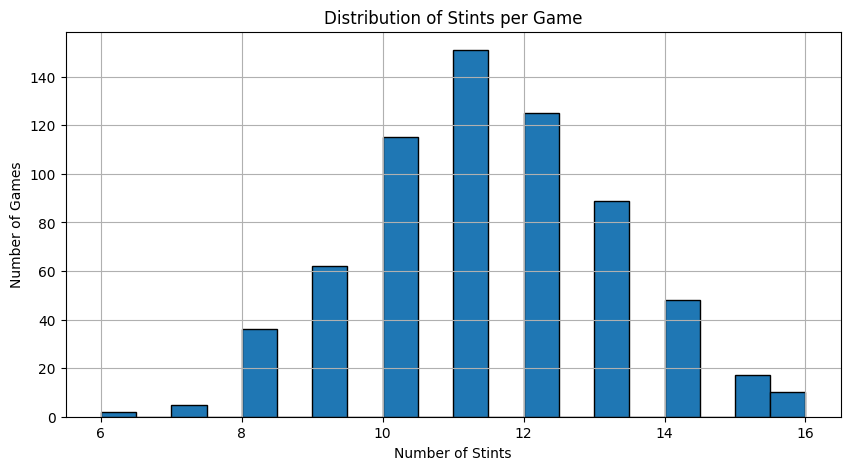

In [34]:
# Distribution of stints per game
plt.figure(figsize=(10, 5))
stints_per_game.hist(bins=20, edgecolor='black')
plt.xlabel('Number of Stints')
plt.ylabel('Number of Games')
plt.title('Distribution of Stints per Game')
plt.show()

## 4. Team Analysis - Wins and Losses

In [35]:
# Get all unique teams
all_teams = set(stint_data['h_team'].unique()) | set(stint_data['a_team'].unique())
print(f"Teams in the dataset: {sorted(all_teams)}")
print(f"Total number of teams: {len(all_teams)}")

Teams in the dataset: ['Argentina', 'Brazil', 'Canada', 'Chile', 'Columbia', 'Denmark', 'France', 'Great.Britain', 'Japan', 'Poland', 'Sweden', 'USA']
Total number of teams: 12


In [36]:
# Aggregate stint data to get game-level results
# Sum goals for each game
game_results = stint_data.groupby(['game_id', 'h_team', 'a_team']).agg({
    'h_goals': 'sum',
    'a_goals': 'sum',
    'minutes': 'sum'
}).reset_index()

game_results.rename(columns={
    'h_goals': 'home_total_goals',
    'a_goals': 'away_total_goals',
    'minutes': 'total_minutes'
}, inplace=True)

# Determine winner
game_results['home_win'] = game_results['home_total_goals'] > game_results['away_total_goals']
game_results['away_win'] = game_results['away_total_goals'] > game_results['home_total_goals']
game_results['draw'] = game_results['home_total_goals'] == game_results['away_total_goals']

print(f"Total games analyzed: {len(game_results)}")
game_results.head(10)

Total games analyzed: 660


,game_id,h_team,a_team,home_total_goals,away_total_goals,total_minutes,home_win,away_win,draw
0,1,USA,Japan,42,63,32.0,False,True,False
1,2,USA,Great.Britain,45,42,32.0,True,False,False
2,3,USA,Canada,60,28,32.0,True,False,False
3,4,USA,France,52,33,32.0,True,False,False
4,5,USA,Denmark,41,53,32.0,False,True,False
5,6,USA,Sweden,83,44,32.0,True,False,False
6,7,USA,Brazil,57,33,32.0,True,False,False
7,8,USA,Columbia,52,39,32.0,True,False,False
8,9,USA,Poland,49,39,32.0,True,False,False
9,10,USA,Argentina,64,32,32.0,True,False,False


In [37]:
# Calculate wins, losses, and draws for each team
team_stats = []

for team in all_teams:
    # Games where team was home
    home_games = game_results[game_results['h_team'] == team]
    home_wins = home_games['home_win'].sum()
    home_losses = home_games['away_win'].sum()
    home_draws = home_games['draw'].sum()
    home_goals_for = home_games['home_total_goals'].sum()
    home_goals_against = home_games['away_total_goals'].sum()
    
    # Games where team was away
    away_games = game_results[game_results['a_team'] == team]
    away_wins = away_games['away_win'].sum()
    away_losses = away_games['home_win'].sum()
    away_draws = away_games['draw'].sum()
    away_goals_for = away_games['away_total_goals'].sum()
    away_goals_against = away_games['home_total_goals'].sum()
    
    # Total stats
    total_games = len(home_games) + len(away_games)
    total_wins = home_wins + away_wins
    total_losses = home_losses + away_losses
    total_draws = home_draws + away_draws
    total_goals_for = home_goals_for + away_goals_for
    total_goals_against = home_goals_against + away_goals_against
    
    team_stats.append({
        'team': team,
        'games': total_games,
        'wins': total_wins,
        'losses': total_losses,
        'draws': total_draws,
        'goals_for': total_goals_for,
        'goals_against': total_goals_against,
        'goal_diff': total_goals_for - total_goals_against
    })

team_stats_df = pd.DataFrame(team_stats)
team_stats_df = team_stats_df.sort_values('wins', ascending=False)
team_stats_df

,team,games,wins,losses,draws,goals_for,goals_against,goal_diff
4,Japan,110,91,19,0,6181,4493,1688
2,USA,110,79,31,0,6098,4849,1249
11,France,110,70,40,0,5718,5139,579
1,Canada,110,66,44,0,5677,5451,226
9,Great.Britain,110,66,44,0,5744,5133,611
0,Poland,110,65,45,0,5403,5127,276
8,Brazil,110,63,47,0,5559,5339,220
10,Denmark,110,57,53,0,5800,5636,164
3,Columbia,110,55,55,0,5103,5079,24
5,Chile,110,23,87,0,5603,6867,-1264


In [38]:
# Team with the most wins
most_wins_team = team_stats_df.loc[team_stats_df['wins'].idxmax()]
print(f"Team with the most wins: {most_wins_team['team']}")
print(f"  - Wins: {int(most_wins_team['wins'])}")
print(f"  - Losses: {int(most_wins_team['losses'])}")
print(f"  - Draws: {int(most_wins_team['draws'])}")
print(f"  - Total Games: {int(most_wins_team['games'])}")

Team with the most wins: Japan
  - Wins: 91
  - Losses: 19
  - Draws: 0
  - Total Games: 110


In [39]:
# Team with the most losses
most_losses_team = team_stats_df.loc[team_stats_df['losses'].idxmax()]
print(f"Team with the most losses: {most_losses_team['team']}")
print(f"  - Wins: {int(most_losses_team['wins'])}")
print(f"  - Losses: {int(most_losses_team['losses'])}")
print(f"  - Draws: {int(most_losses_team['draws'])}")
print(f"  - Total Games: {int(most_losses_team['games'])}")

Team with the most losses: Sweden
  - Wins: 12
  - Losses: 98
  - Draws: 0
  - Total Games: 110


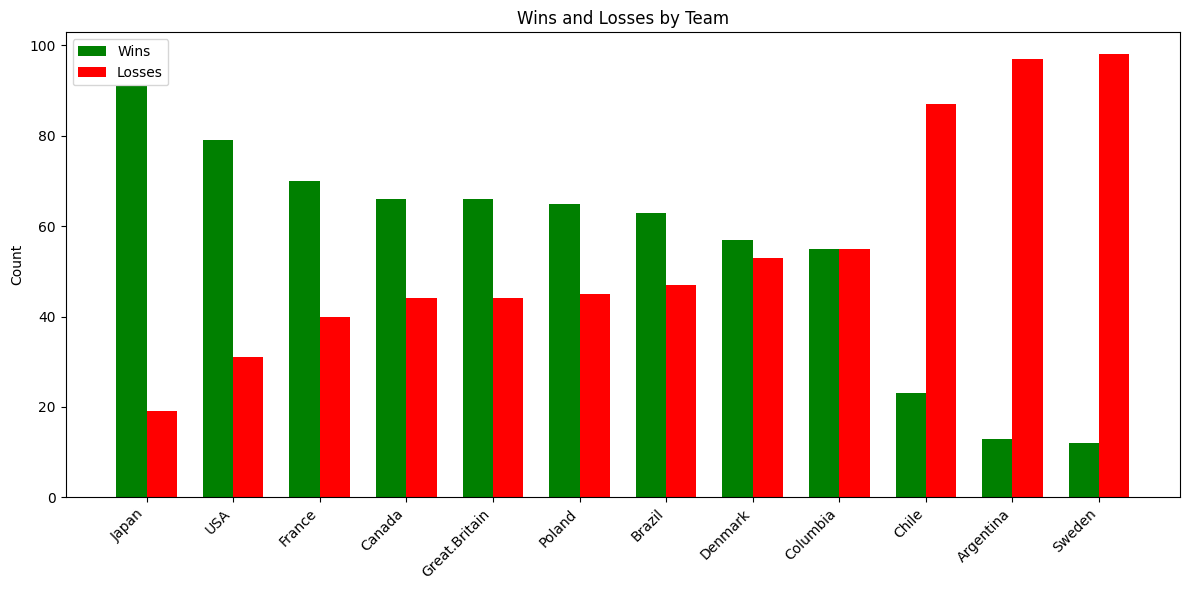

In [40]:
# Visualize team wins and losses
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(team_stats_df))
width = 0.35

bars1 = ax.bar(x - width/2, team_stats_df['wins'], width, label='Wins', color='green')
bars2 = ax.bar(x + width/2, team_stats_df['losses'], width, label='Losses', color='red')

ax.set_ylabel('Count')
ax.set_title('Wins and Losses by Team')
ax.set_xticks(x)
ax.set_xticklabels(team_stats_df['team'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

## 5. Player Analysis

In [41]:
# Total number of players
num_players = len(player_data)
print(f"Total number of players: {num_players}")

# Extract team from player name
player_data['team'] = player_data['player'].apply(lambda x: '_'.join(x.split('_')[:-1]))

# Players per team
players_per_team = player_data.groupby('team').size()
print(f"\nPlayers per team:")
print(players_per_team)

Total number of players: 144

Players per team:
team
Argentina        12
Brazil           12
Canada           12
Chile            12
Columbia         12
Denmark          12
France           12
Great.Britain    12
Japan            12
Poland           12
Sweden           12
USA              12
dtype: int64


In [42]:
# Player rating distribution by team
team_ratings = player_data.groupby('team')['rating'].agg(['mean', 'min', 'max', 'std'])
team_ratings = team_ratings.sort_values('mean', ascending=False)
print("Player Rating Statistics by Team:")
team_ratings

Player Rating Statistics by Team:


,mean,min,max,std
team,,,,
Sweden,2.291667,0.0,3.5,1.032612
Japan,2.125000,0.5,3.5,0.979912
Brazil,2.083333,0.5,3.5,1.104399
Great.Britain,2.083333,0.0,3.5,0.949482
Canada,2.041667,0.0,3.5,1.137348
Denmark,2.041667,0.5,3.5,0.964326
Poland,2.041667,0.5,3.0,0.964326
USA,2.041667,0.0,3.5,1.214652
France,1.916667,0.5,3.5,1.062444


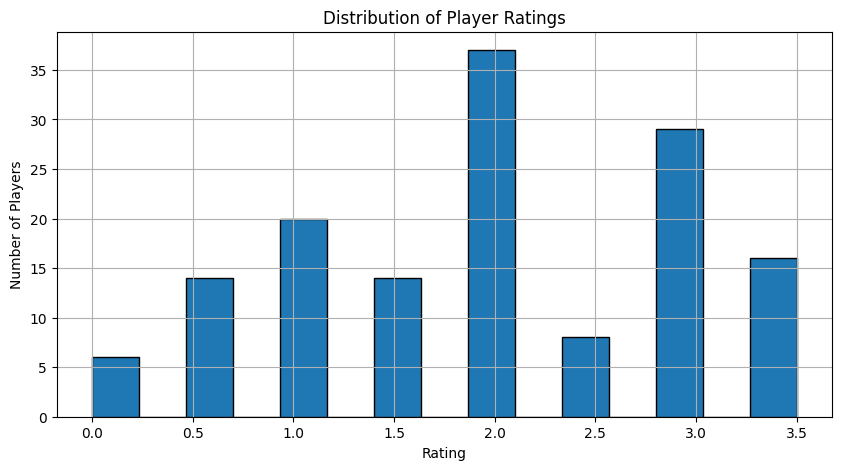

In [43]:
# Player rating distribution
plt.figure(figsize=(10, 5))
player_data['rating'].hist(bins=15, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Number of Players')
plt.title('Distribution of Player Ratings')
plt.show()

/var/folders/f2/vjmc3b014_b217dgc3vhbpcw0000gn/T/ipykernel_5750/3101477658.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(team_groups, labels=teams_sorted)


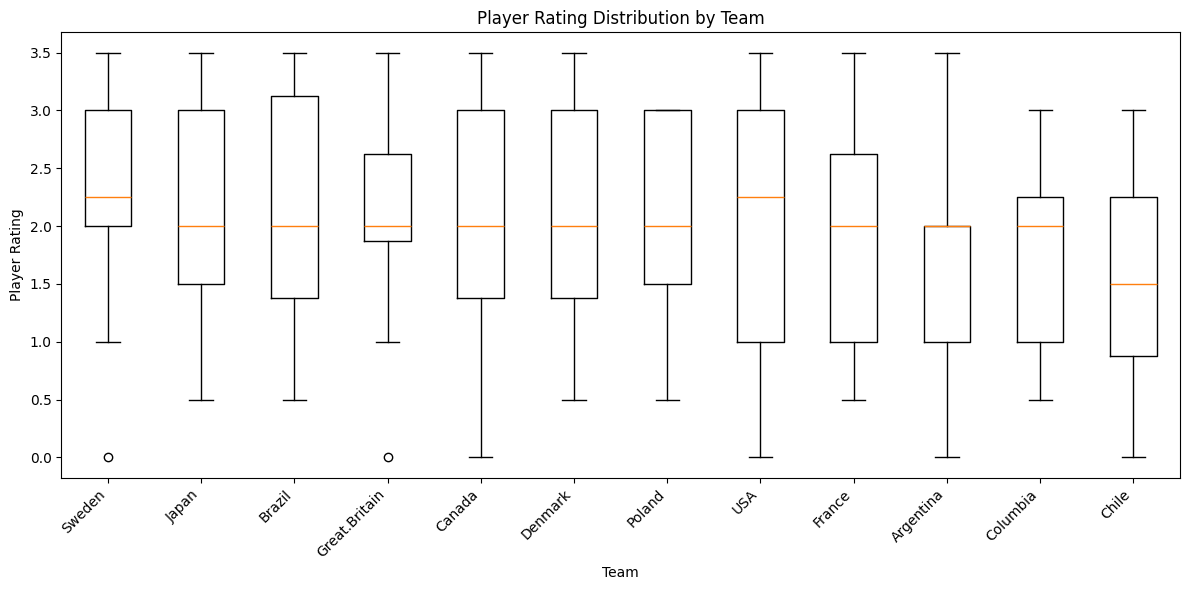

In [44]:
# Boxplot of player ratings by team
plt.figure(figsize=(12, 6))
teams_sorted = player_data.groupby('team')['rating'].mean().sort_values(ascending=False).index
player_data_sorted = player_data.set_index('team').loc[teams_sorted].reset_index()

# Create boxplot
team_groups = [player_data[player_data['team'] == team]['rating'].values for team in teams_sorted]
plt.boxplot(team_groups, labels=teams_sorted)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Team')
plt.ylabel('Player Rating')
plt.title('Player Rating Distribution by Team')
plt.tight_layout()
plt.show()

In [45]:
# Top 10 highest rated players
top_players = player_data.nlargest(10, 'rating')[['player', 'team', 'rating']]
print("Top 10 Highest Rated Players:")
top_players

Top 10 Highest Rated Players:


,player,team,rating
2,USA_p3,USA,3.5
10,USA_p11,USA,3.5
20,Japan_p9,Japan,3.5
22,Japan_p11,Japan,3.5
25,Great.Britain_p2,Great.Britain,3.5
40,Canada_p5,Canada,3.5
43,Canada_p8,Canada,3.5
49,France_p2,France,3.5
58,France_p11,France,3.5
67,Denmark_p8,Denmark,3.5


## 6. Summary

In [46]:
# Print summary statistics
print("=" * 50)
print("DATA INVESTIGATION SUMMARY")
print("=" * 50)
print(f"\n📊 Dataset Overview:")
print(f"   - Total stints: {num_stints}")
print(f"   - Total unique games: {num_games}")
print(f"   - Total players: {num_players}")
print(f"   - Total teams: {len(all_teams)}")

print(f"\n🏆 Team Performance:")
print(f"   - Team with most wins: {most_wins_team['team']} ({int(most_wins_team['wins'])} wins)")
print(f"   - Team with most losses: {most_losses_team['team']} ({int(most_losses_team['losses'])} losses)")

best_goal_diff_team = team_stats_df.loc[team_stats_df['goal_diff'].idxmax()]
print(f"   - Best goal difference: {best_goal_diff_team['team']} (+{int(best_goal_diff_team['goal_diff'])})")

print(f"\n⭐ Player Ratings:")
print(f"   - Average player rating: {player_data['rating'].mean():.2f}")
print(f"   - Highest rated player: {player_data.loc[player_data['rating'].idxmax(), 'player']} ({player_data['rating'].max()})")
print(f"   - Lowest rated player: {player_data.loc[player_data['rating'].idxmin(), 'player']} ({player_data['rating'].min()})")

print(f"\n⏱️ Game Duration:")
print(f"   - Average total game time: {game_results['total_minutes'].mean():.2f} minutes")
print(f"   - Average stint duration: {stint_data['minutes'].mean():.2f} minutes")

DATA INVESTIGATION SUMMARY

📊 Dataset Overview:
   - Total stints: 7448
   - Total unique games: 660
   - Total players: 144
   - Total teams: 12

🏆 Team Performance:
   - Team with most wins: Japan (91 wins)
   - Team with most losses: Sweden (98 losses)
   - Best goal difference: Japan (+1688)

⭐ Player Ratings:
   - Average player rating: 1.98
   - Highest rated player: USA_p3 (3.5)
   - Lowest rated player: USA_p4 (0.0)

⏱️ Game Duration:
   - Average total game time: 32.09 minutes
   - Average stint duration: 2.84 minutes
